In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random


def convert_to_gray(image):
    if len(image.shape) == 2:
        return image
    gray_image = np.mean(image, axis=2).astype(np.uint8)
    return gray_image

In [39]:
def add_salt_pepper_noise(image, percentage):
    noise = percentage/100
    width, height = image.shape
    noisy_image = image.copy()
    total_pixel = width * height
    noise_pixel = int(total_pixel*noise)
    for i in range(noise_pixel):
        random_row = random.randint(0+7, width-7)
        random_col = random.randint(0+7, height-7)
        noisy_image[random_row][random_col] = random.choice([0,255])
        # noisy_image[random_row][random_col] = 255
    return noisy_image

In [40]:
def cal_psnr(image1, image2):
    image1 = np.float64(image1)
    image2 = np.float64(image2)
    mse = np.mean((image1-image2) ** 2)
    
    if mse == 0:
        return float('inf')
    
    psnr = 20*np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

In [41]:
rgb_image = plt.imread('lena.jpg')
gray_image = convert_to_gray(rgb_image)

In [42]:
noise_percentage = 10
noisy_image = add_salt_pepper_noise(gray_image, noise_percentage)
psnr = cal_psnr(gray_image, noisy_image)

In [43]:
def harmonic_mean(image, kernel_size):
    filtered_image = np.zeros_like(image)
    pad_size = kernel_size // 2
    row, col = image.shape
    starting_row = 0+pad_size
    starting_col = 0+pad_size
    ending_row = row - pad_size
    ending_col = col - pad_size
    for i in range(starting_row, ending_row):
        for j in range(starting_col, ending_col):
            window = noisy_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            #Handle zero values by setting them to a small positive value.
            window[window == 0] = 0.01
            num_zeros = np.count_nonzero(window == 0)
            if num_zeros == 0:
                # Calculate the reciprocal of the window.
                reciprocal_window = 1.0 / window
                # Calculate the harmonic mean of the window.
                harmonic_mean = (kernel_size * kernel_size) / np.sum(reciprocal_window)
                # Set the filtered pixel value to the harmonic mean.
                filtered_image[i][j] = harmonic_mean
                # print("if")
            else:
                # If there is a divide-by-zero error, set the filtered pixel value to 0.
                # print("else")
                filtered_image[i][j] = 0
    return filtered_image

In [44]:
def apply_geometric_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixel = 1
            count = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (image[r + x, c + y]):
                            count += 1
                            pixel = pixel * int(image[r + x, c + y])
            count = 1 if count == 0 else count
            filtered_image[r, c] = pixel ** (1 / count)

    return np.uint8(filtered_image)

In [45]:
kernel_size = 5
harmonic_mean_filtered_image = harmonic_mean(noisy_image, kernel_size)
harmonic_psnr = cal_psnr(gray_image, harmonic_mean_filtered_image)
geometric_mean_filtered_image = apply_geometric_mean_filter(noisy_image, kernel_size)
geometric_psnr = cal_psnr(gray_image, geometric_mean_filtered_image)

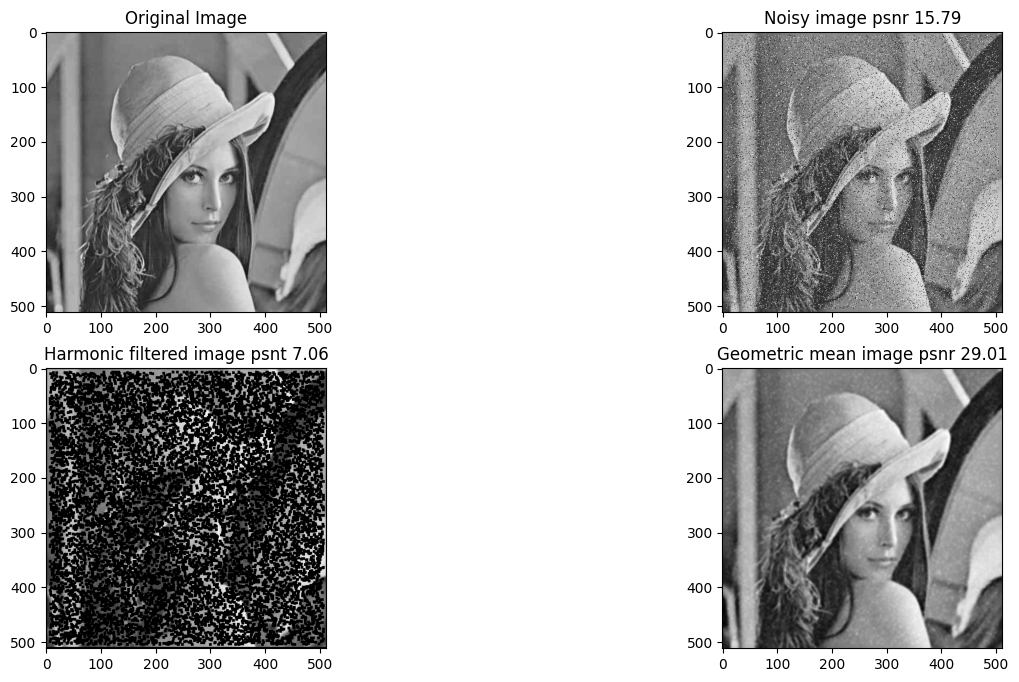

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy image psnr {psnr}')
plt.subplot(2,2,3)
plt.imshow(harmonic_mean_filtered_image, cmap='gray')
plt.title(f'Harmonic filtered image psnt {harmonic_psnr}')
plt.subplot(2,2,4)
plt.imshow(geometric_mean_filtered_image, cmap='gray')
plt.title(f'Geometric mean image psnr {geometric_psnr}')
plt.tight_layout
plt.show()